## R SWAT Modelagem

Github do SWAT: https://github.com/sassoftware/R-swat

Action sets: https://go.documentation.sas.com/?docsetId=allprodsactions&docsetTarget=actionSetsByName.htm&docsetVersion=3.5&locale=en

Documentação: https://developer.sas.com/apis/swat/r/v1.3.0/R-swat.pdf

In [ ]:
#install.packages('https://github.com/sassoftware/R-swat/releases/download/v1.5.0/R-swat-1.5.0-linux64.tar.gz',
#                   repos=NULL, type='file')
#install.packages('https://github.com/sassoftware/R-swat/releases/download/v1.5.0/R-swat-1.5.0-win64.tar.gz',
#                   repos=NULL, type='file')


In [1]:
# Load necessary packages
library('swat')
library('ggplot2')
library('reshape2')
#options(cas.print.messages = FALSE)

SWAT 1.5.0



In [ ]:
#.authinfo file
#default user <USER> password <PASSWORD>

In [4]:
conn <- CAS('pdcesx16126.exnet.sas.com', 
            port=8777, protocol = "http",
            caslib = 'casuser',
             authinfo = './.authinfo')

NOTE: Connecting to CAS and generating CAS action functions for loaded

      action sets...

NOTE: To generate the functions with signatures (for tab completion), set 

      options(cas.gen.function.sig=TRUE).



In [2]:
#conn <- CAS('pdcesx14134.exnet.sas.com', 
#            port=8777, protocol = "http",
#            caslib = 'casuser', 
#            username = 'username', password = 'password')

NOTE: Connecting to CAS and generating CAS action functions for loaded

      action sets...

NOTE: To generate the functions with signatures (for tab completion), set 

      options(cas.gen.function.sig=TRUE).



In [4]:
conn <- CAS('localhost', 
            port=8777, protocol = "http",
            caslib = 'casuser', 
            username = 'sas', password = 'Orion123')

NOTE: Connecting to CAS and generating CAS action functions for loaded

      action sets...

NOTE: To generate the functions with signatures (for tab completion), set 

      options(cas.gen.function.sig=TRUE).



In [5]:
cas.table.tableInfo(conn, caslib = 'public')

NOTE: No tables are available in caslib Public of Cloud Analytic Services.



list()

In [7]:
cas.table.caslibInfo(conn)

$CASLibInfo
          Name Type                                           Description
1 CASUSER(sas) PATH                           Personal File System Caslib
2      Formats PATH                          Stores user defined formats.
3       Public PATH Shared and writeable caslib, accessible to all users.
4      Samples PATH                  Stores sample data, supplied by SAS.
                                            Path Definition Subdirs Local
1                             /home/sas/casuser/                  1     0
2 /opt/sas/viya/config/data/cas/default/formats/                  0     0
3  /opt/sas/viya/config/data/cas/default/public/                  0     0
4 /opt/sas/viya/config/data/cas/default/samples/                  0     0
  Active Personal Hidden Transient
1      1        1      0         1
2      0        0      0         0
3      0        0      0         0
4      0        0      0         0

In [8]:
## Carregando Actionsets no CAS
actionsets <- c('sampling', 'decisionTree', 'neuralNet', 'percentile')
for(i in actionsets){
    loadActionSet(conn, i)
}

NOTE: Added action set 'sampling'.

NOTE: Information for action set 'sampling':

NOTE:    sampling

NOTE:       srs -  Samples a proportion of data from the input table or partitions the data into no more than three portions

NOTE:       stratified - Samples a proportion of data or partitions the data into no more than three portions within each stratum

NOTE:       oversample - Samples a user-specified proportion of data from the event level and adjusts the ratio between rare events and non-rare events to a user-specified ratio

NOTE:       kfold - K-fold partitioning.

NOTE: Added action set 'decisionTree'.

NOTE: Information for action set 'decisionTree':

NOTE:    decisionTree

NOTE:       dtreeTrain - Trains a decision tree

NOTE:       dtreeScore - Scores a table using a decision tree model

NOTE:       dtreeSplit - Splits decision tree nodes

NOTE:       dtreePrune - Prune a decision tree

NOTE:       dtreeMerge - Merges decision tree nodes

NOTE:       dtreeCode - Generates DA

In [113]:
# Carregando dados para CAS
castbl <- cas.read.csv(conn, './data/hmeq.csv')


NOTE: Cloud Analytic Services made the uploaded file available as table HMEQ in caslib CASUSER(sas).



In [114]:
cas.table.tableInfo(conn)

$TableInfo
       Name Rows Columns IndexedColumns Encoding       CreateTimeFormatted
1  DT_MODEL   35      38              0    utf-8 2020-08-03T22:06:03+00:00
2 DT_SCORED 5960      16              0    utf-8 2020-08-03T22:14:49+00:00
3      HMEQ 5960      13              0    utf-8 2020-08-03T22:21:15+00:00
           ModTimeFormatted       AccessTimeFormatted JavaCharSet CreateTime
1 2020-08-03T22:06:03+00:00 2020-08-03T22:14:49+00:00        UTF8 1912111563
2 2020-08-03T22:14:49+00:00 2020-08-03T22:14:49+00:00        UTF8 1912112089
3 2020-08-03T22:21:15+00:00 2020-08-03T22:21:15+00:00        UTF8 1912112475
     ModTime AccessTime Global Repeated View MultiPart SourceName SourceCaslib
1 1912111563 1912112089      0        0    0         0                        
2 1912112089 1912112089      0        0    0         0                        
3 1912112475 1912112475      0        0    0         0                        
  Compressed Creator Modifier    SourceModTimeFormatted SourceModTime
1          0     sas                                              NaN
2          0     sas                                              NaN
3          0     sas          2020-08-03T22:21:15+00:00    1912112475

In [12]:
class(castbl)

[1] "CASTable"
attr(,"package")
[1] "swat"

In [14]:
head(castbl)

BAD LOAN MORTDUE VALUE  REASON  JOB    YOJ  DEROG DELINQ CLAGE     NINQ CLNO
1 1   1100 25860    39025 HomeImp Other  10.5   0     0     94.36667   1    9 
2 1   1300 70053    68400 HomeImp Other   7.0   0     2    121.83333   0   14 
3 1   1500 13500    16700 HomeImp Other   4.0   0     0    149.46667   1   10 
4 1   1500   NaN      NaN                 NaN NaN   NaN          NaN NaN  NaN 
5 0   1700 97800   112000 HomeImp Office  3.0   0     0     93.33333   0   14 
6 1   1700 30548    40320 HomeImp Other   9.0   0     0    101.46600   1    8 
  DEBTINC 
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6 37.11361

In [115]:
summary(castbl)

ERROR: Error: `x` must be a vector, not a `casDataFrame` object.


In [18]:
table <- cas.simple.summary(castbl)

In [19]:
table

$Summary
    Column          Min         Max    N NMiss         Mean          Sum
1      BAD    0.0000000      1.0000 5960     0 1.994966e-01      1189.00
2     LOAN 1100.0000000  89900.0000 5960     0 1.860797e+04 110903500.00
3  MORTDUE 2063.0000000 399550.0000 5442   518 7.376082e+04 401406367.20
4    VALUE 8000.0000000 855909.0000 5848   112 1.017760e+05 595186333.04
5      YOJ    0.0000000     41.0000 5445   515 8.922268e+00     48581.75
6    DEROG    0.0000000     10.0000 5252   708 2.545697e-01      1337.00
7   DELINQ    0.0000000     15.0000 5380   580 4.494424e-01      2418.00
8    CLAGE    0.0000000   1168.2336 5652   308 1.797663e+02   1016038.99
9     NINQ    0.0000000     17.0000 5450   510 1.186055e+00      6464.00
10    CLNO    0.0000000     71.0000 5738   222 2.129610e+01    122197.00
11 DEBTINC    0.5244992    203.3121 4693  1267 3.377992e+01    158529.14
            Std       StdErr          Var          USS          CSS        CV
1  3.996555e-01 5.176815e-03 1.597245e-01 1.189000e+03 9.517985e+02 200.33195
2  1.120748e+04 1.451727e+02 1.256076e+08 2.812185e+12 7.484958e+11  60.22946
3  4.445761e+04 6.026523e+02 1.976479e+09 4.036208e+13 1.075402e+13  60.27266
4  5.738578e+04 7.504134e+02 3.293127e+09 7.983063e+13 1.925491e+13  56.38436
5  7.573982e+00 1.026421e-01 5.736521e+01 7.457556e+05 3.122962e+05  84.88853
6  8.460468e-01 1.167433e-02 7.157951e-01 4.099000e+03 3.758640e+03 332.34388
7  1.127266e+00 1.536863e-02 1.270728e+00 7.922000e+03 6.835248e+03 250.81434
8  8.581009e+01 1.141398e+00 7.363372e+03 2.242600e+08 4.161041e+07  47.73425
9  1.728675e+00 2.341613e-02 2.988317e+00 2.395000e+04 1.628334e+04 145.74998
10 1.013893e+01 1.338480e-01 1.027980e+02 3.192071e+06 5.897519e+05  47.60935
11 8.601746e+00 1.255629e-01 7.399004e+01 5.702262e+06 3.471613e+05  25.46408
      TValue         ProbT  Skewness   Kurtosis
1   38.53656 2.720203e-290 1.5043167  0.2630568
2  128.17819  0.000000e+00 2.0237807  6.9325898
3  122.39365  0.000000e+00 1.8144807  6.4818663
4  135.62664  0.000000e+00 3.0533443 24.3628049
5   86.92605  0.000000e+00 0.9884601  0.3720725
6   21.80593 5.478603e-101 5.3208703 36.8727634
7   29.24414 1.326786e-174 4.0231496 23.5654487
8  157.49651  0.000000e+00 1.3434120  7.5995493
9   50.65120  0.000000e+00 2.6219842  9.7865073
10 159.10653  0.000000e+00 0.7750518  1.1576727
11 269.02783  0.000000e+00 2.8523534 50.5040415

In [22]:
table$Summary[c(1:3),c('Min', 'Max')]

Min  Max   
1    0      1
2 1100  89900
3 2063 399550

In [23]:
# Trazer dados para maquina local
df <- to.casDataFrame(castbl, obs = nrow(castbl))

In [24]:
head(df)

BAD LOAN MORTDUE VALUE  REASON  JOB    YOJ  DEROG DELINQ CLAGE     NINQ CLNO
1 1   1100 25860    39025 HomeImp Other  10.5   0     0     94.36667   1    9 
2 1   1300 70053    68400 HomeImp Other   7.0   0     2    121.83333   0   14 
3 1   1500 13500    16700 HomeImp Other   4.0   0     0    149.46667   1   10 
4 1   1500   NaN      NaN                 NaN NaN   NaN          NaN NaN  NaN 
5 0   1700 97800   112000 HomeImp Office  3.0   0     0     93.33333   0   14 
6 1   1700 30548    40320 HomeImp Other   9.0   0     0    101.46600   1    8 
  DEBTINC 
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6 37.11361

In [26]:
# Formatacao de dados
d <- melt(df[sapply(df, is.numeric)], id.vars=NULL)
head(d)

variable value
1 BAD      1    
2 BAD      1    
3 BAD      1    
4 BAD      1    
5 BAD      0    
6 BAD      1

In [27]:
tail(d)

variable value   
65555 DEBTINC       NaN
65556 DEBTINC  36.08804
65557 DEBTINC  36.75365
65558 DEBTINC  36.26269
65559 DEBTINC  34.75116
65560 DEBTINC  34.24246

Warning message:
“Removed 4740 rows containing non-finite values (stat_bin).”


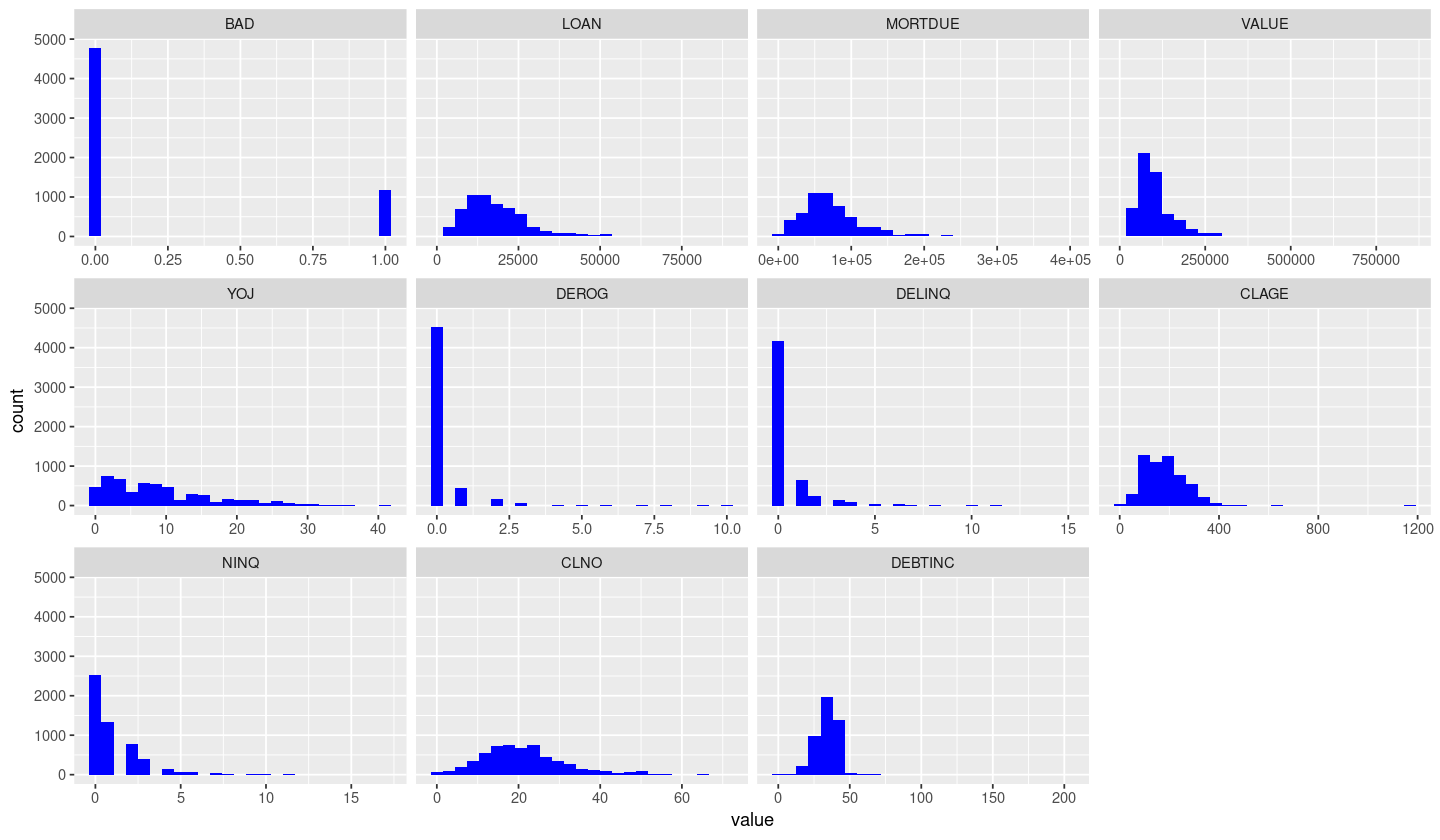

In [28]:
options(repr.plot.width=12, repr.plot.height=7)

ggplot(d, aes(x = value)) +
    geom_histogram(fill = 'blue', bins = 25) +
    facet_wrap(~variable,
               scales = 'free_x') 

In [116]:
cas.table.promote(conn, name = 'hmeq')

ERROR: Parameter 'replace' is not recognized.

ERROR: Expecting one of the following: name, caslib, target, targetLib, drop, quiet, sourceCaslib, targetCaslib, silent.

ERROR: The action stopped due to errors.



list()

In [53]:
# Ver dados faltantes de todas variaveis
tbl <- cas.simple.distinct(castbl)
tbl$Distinct

Column  NDistinct NMiss Trunc
1  BAD        2         0  0    
2  LOAN     540         0  0    
3  MORTDUE 5054       518  0    
4  VALUE   5382       112  0    
5  REASON     3       252  0    
6  JOB        7       279  0    
7  YOJ      100       515  0    
8  DEROG     12       708  0    
9  DELINQ    15       580  0    
10 CLAGE   5315       308  0    
11 NINQ      17       510  0    
12 CLNO      63       222  0    
13 DEBTINC 4694      1267  0

In [55]:
tbl <- tbl$Distinct

In [56]:
tbl

Column  NDistinct NMiss Trunc
1  BAD        2         0  0    
2  LOAN     540         0  0    
3  MORTDUE 5054       518  0    
4  VALUE   5382       112  0    
5  REASON     3       252  0    
6  JOB        7       279  0    
7  YOJ      100       515  0    
8  DEROG     12       708  0    
9  DELINQ    15       580  0    
10 CLAGE   5315       308  0    
11 NINQ      17       510  0    
12 CLNO      63       222  0    
13 DEBTINC 4694      1267  0

In [57]:
# Pegando dados missing
cas.nmiss(castbl)

BAD    LOAN MORTDUE   VALUE     YOJ   DEROG  DELINQ   CLAGE    NINQ    CLNO 
      0       0     518     112     515     708     580     308     510     222 
DEBTINC 
   1267

In [58]:
# Visualizacao de missing
tbl$PctMiss <- tbl$NMiss/nrow(castbl)

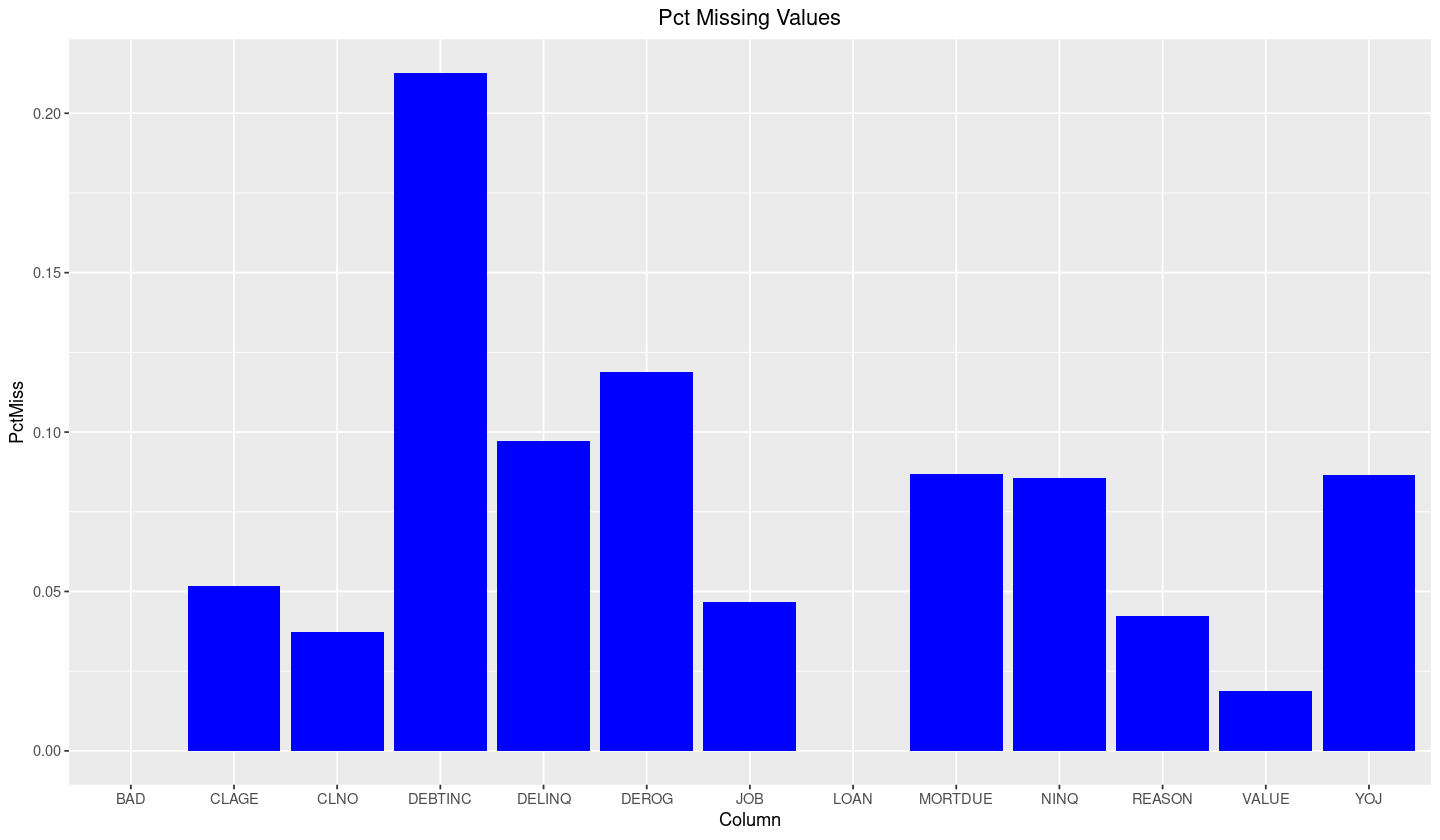

In [60]:
ggplot(tbl, aes(Column, PctMiss)) +
    geom_col(fill = 'blue') +
    ggtitle('Pct Missing Values') +
    theme(plot.title = element_text(hjust = 0.5))

In [117]:
# Imputacao de dados missing
cas.dataPreprocess.impute(castbl,
    methodContinuous = 'MEDIAN',
    methodNominal = 'MODE',
    inputs = colnames(castbl)[-1],
    copyAllVars = TRUE,
    casOut = list(name = 'hmeq', 
                replace = TRUE)
)

$ImputeInfo
   Variable ImputeTech   ResultVar    N NMiss ImputedValueContinuous
1      LOAN     Median    IMP_LOAN 5960     0            16300.00000
2   MORTDUE     Median IMP_MORTDUE 5442   518            65019.00000
3     VALUE     Median   IMP_VALUE 5848   112            89235.50000
4    REASON       Mode  IMP_REASON 5708   252                    NaN
5       JOB       Mode     IMP_JOB 5681   279                    NaN
6       YOJ     Median     IMP_YOJ 5445   515                7.00000
7     DEROG     Median   IMP_DEROG 5252   708                0.00000
8    DELINQ     Median  IMP_DELINQ 5380   580                0.00000
9     CLAGE     Median   IMP_CLAGE 5652   308              173.46667
10     NINQ     Median    IMP_NINQ 5450   510                1.00000
11     CLNO     Median    IMP_CLNO 5738   222               20.00000
12  DEBTINC     Median IMP_DEBTINC 4693  1267               34.81826
   ImputedValueNominal
1                     
2                     
3                     
4              DebtCon
5                Other
6                     
7                     
8                     
9                     
10                    
11                    
12                    

$OutputCasTables
        casLib Name Rows Columns
1 CASUSER(sas) hmeq 5960      25

In [119]:
# Particionamento de dados
cas.sampling.srs(conn,
    table = 'hmeq',
    samppct = 30,
    partind = TRUE,
    output = list(casOut = list(name = 'hmeq', replace = TRUE), 
                  copyVars = 'ALL')
)

NOTE: Simple Random Sampling is in effect.

NOTE: Using SEED=1497089944 for sampling.



$OutputCasTables
        casLib Name Label Rows Columns
1 CASUSER(sas) hmeq       5960      26

$SRSFreq
  NObs NSamp
1 5960  1788

In [120]:
hmeq1 <- defCasTable(conn, 'hmeq')

In [121]:
head(hmeq1)

BAD LOAN MORTDUE VALUE  REASON  JOB    YOJ  DEROG DELINQ CLAGE     ⋯
1 1   1100 25860    39025 HomeImp Other  10.5   0     0     94.36667 ⋯
2 1   1300 70053    68400 HomeImp Other   7.0   0     2    121.83333 ⋯
3 1   1500 13500    16700 HomeImp Other   4.0   0     0    149.46667 ⋯
4 1   1500   NaN      NaN                 NaN NaN   NaN          NaN ⋯
5 0   1700 97800   112000 HomeImp Office  3.0   0     0     93.33333 ⋯
6 1   1700 30548    40320 HomeImp Other   9.0   0     0    101.46600 ⋯
  IMP_DELINQ IMP_DEROG IMP_LOAN IMP_MORTDUE IMP_NINQ IMP_VALUE IMP_YOJ IMP_JOB
1 0          0         1100     25860       1         39025.0  10.5    Other  
2 2          0         1300     70053       0         68400.0   7.0    Other  
3 0          0         1500     13500       1         16700.0   4.0    Other  
4 0          0         1500     65019       1         89235.5   7.0    Other  
5 0          0         1700     97800       0        112000.0   3.0    Office 
6 0          0         1700     30548       1         40320.0   9.0    Other  
  IMP_REASON _PartInd_
1 HomeImp    0        
2 HomeImp    0        
3 HomeImp    1        
4 DebtCon    0        
5 HomeImp    0        
6 HomeImp    0

In [69]:
indata <- 'hmeq'

# Pega infromacao das variaveis
colinfo <- head(cas.table.columnInfo(conn, table = indata)$ColumnInfo, -1)

In [74]:
# Variavel target
target <- colinfo$Column[1]


In [75]:
# Separacao para modelos que lidam com missing
inputs <- colinfo$Column[-1]
nominals <- c(target, subset(colinfo, Type == 'varchar')$Column)

In [77]:
# Separacao para modelos que nao lidam com missing
imp.inputs <- grep('IMP_', inputs, value = T)
imp.nominals <- c(target, grep('IMP_', nominals, value = T))

In [79]:
# Treina modelos
## Arvore de decisão
cas.decisionTree.dtreeTrain(conn,
    table = list(name = indata, where = '_PartInd_ = 0'),
    target = target,
    inputs = inputs,
    nominals = nominals,
    varImp = TRUE,
    casOut = list(name = 'dt_model', replace = TRUE)
)

$DTreeVarImpInfo
  Variable  Importance         Std Count
1  DEBTINC 477.7679949 226.2531922     2
2   DELINQ  33.8752090   7.1858673     2
3    VALUE  33.0092799   2.5891956     2
4    DEROG  19.9812027   3.5773553     3
5      JOB  13.6796537   0.1731602     2
6  MORTDUE   6.5390661   2.6828479     2
7     LOAN   2.4572284   0.0000000     1
8    CLAGE   1.4529223   0.1315894     2
9      YOJ   0.3636364   0.0000000     1

$ModelInfo
                          Descr     Value
1          Number of Tree Nodes   35.0000
2        Max Number of Branches    2.0000
3              Number of Levels    6.0000
4              Number of Leaves   18.0000
5                Number of Bins   50.0000
6        Minimum Size of Leaves    5.0000
7        Maximum Size of Leaves 3117.0000
8           Number of Variables   24.0000
9  Confidence Level for Pruning    0.2500
10  Number of Observations Used 4172.0000
11  Misclassification Error (%)   12.9674

$OutputCasTables
        casLib     Name Rows Columns
1 CASUSER(sas) dt_model   35      38

In [180]:
### Prevendo um unico modelo
cas.decisionTree.dtreeScore(
    object       = hmeq1,
    modelTable   = list(name = 'dt_model'),
    copyVars     = list(target, '_PartInd_'),
    assessonerow = TRUE,
    casOut       = list(name = 'dt_scored', replace = T)
)

$OutputCasTables
        casLib      Name Rows Columns
1 CASUSER(sas) dt_scored 5960      16

$ScoreInfo
                        Descr                            Value
1 Number of Observations Read                             5960
2 Number of Observations Used                             5960
3 Misclassification Error (%)                     12.986577181

In [177]:
dt_scores <- defCasTable(conn, 'dt_scored')

In [182]:
head(dt_scores)

BAD _PartInd_ _DT_PredName_ _DT_PredP_ _DT_PredLevel_ _LeafID_ _MissIt_
1 1   0                    1  0.5263158  0              28       0       
2 1   0                    1  0.5263158  0              28       0       
3 1   1                    1  0.5263158  0              28       0       
4 1   0                    1  0.8000000  0              10       0       
5 0   0                    1  0.5263158  0              28       1       
6 1   0                    0  0.7200000  1              34       1       
  _NumNodes_ _NodeList0_ _NodeList1_ _NodeList2_ _NodeList3_ _NodeList4_
1 6          0           1           3            8           18        
2 6          0           1           3            8           18        
3 6          0           1           3            8           18        
4 4          0           1           4           10          NaN        
5 6          0           1           3            8           18        
6 6          0           2           5           12           22        
  _NodeList5_
1  28        
2  28        
3  28        
4 NaN        
5  28        
6  34

In [161]:
## Random Forest
cas.decisionTree.forestTrain(conn,
    table = list(name = indata, where = '_PartInd_ = 0'),
    target = target,
    inputs = inputs,
    nominals = nominals,
    casOut = list(name = 'rf_model', replace = TRUE)
)

$ModelInfo
                              Descr      Value
1                   Number of Trees   50.00000
2  Number of Selected Variables (M)    5.00000
3                Random Number Seed    0.00000
4          Bootstrap Percentage (%)   63.21206
5                    Number of Bins   50.00000
6               Number of Variables   24.00000
7      Confidence Level for Pruning    0.25000
8          Max Number of Tree Nodes   43.00000
9          Min Number of Tree Nodes   25.00000
10           Max Number of Branches    2.00000
11           Min Number of Branches    2.00000
12             Max Number of Levels    6.00000
13             Min Number of Levels    6.00000
14             Max Number of Leaves   22.00000
15             Min Number of Leaves   13.00000
16           Maximum Size of Leaves 2395.00000
17           Minimum Size of Leaves    5.00000
18               Out-of-Bag MCR (%)        NaN
19         Average number of Leaves   16.74000

$OutputCasTables
        casLib     Name Rows Columns
1 CASUSER(sas) rf_model 1624      42

In [162]:
## Gradient Boosting
cas.decisionTree.gbtreeTrain(conn,
    table = list(name = indata, where = '_PartInd_ = 0'),
    target = target,
    inputs = inputs,
    nominals = nominals,
    casOut = list(name = 'gbt_model', replace = TRUE)
)

$ModelInfo
                              Descr  Value
1                   Number of Trees   50.0
2                      Distribution    2.0
3                     Learning Rate    0.1
4                  Subsampling Rate    0.5
5  Number of Selected Variables (M)   24.0
6                    Number of Bins   50.0
7               Number of Variables   24.0
8          Max Number of Tree Nodes   31.0
9          Min Number of Tree Nodes   17.0
10           Max Number of Branches    2.0
11           Min Number of Branches    2.0
12             Max Number of Levels    5.0
13             Min Number of Levels    5.0
14             Max Number of Leaves   16.0
15             Min Number of Leaves    9.0
16           Maximum Size of Leaves 1734.0
17           Minimum Size of Leaves    5.0
18               Random Number Seed    0.0
19               Lasso (L1) penalty    0.0
20               Ridge (L2) penalty    1.0
21           Actual Number of Trees   50.0
22         Average number of Leaves   14.4

$OutputCasTables
        casLib      Name Rows Columns
1 CASUSER(sas) gbt_model 1390      32

In [163]:
## Neural Network
cas.neuralNet.annTrain(conn,
    table = list(name = indata, where = '_PartInd_ = 0'),
    target = target,
    inputs = imp.inputs,
    hidden = 7,
    nominals = imp.nominals,
    casOut = list(name = 'nn_model', replace = TRUE)
)

$ConvergenceStatus
                                          Reason
1 The optimization exited on maximum iterations.

$ModelInfo
                         Descr        Value
1                        Model   Neural Net
2  Number of Observations Used         4172
3  Number of Observations Read         4172
4     Target/Response Variable          BAD
5              Number of Nodes           27
6        Number of Input Nodes           18
7       Number of Output Nodes            2
8       Number of Hidden Nodes            7
9      Number of Hidden Layers            1
10 Number of Weight Parameters          133
11   Number of Bias Parameters            9
12                Architecture          MLP
13       Number of Neural Nets            1
14             Objective Value 1.4975083415

$OptIterHistory
   Progress Objective     Loss  FitError
1         1  3.235581 3.235581 0.6052253
2         2  2.022344 2.022344 0.2102109
3         3  1.867807 1.867807 0.2013423
4         4  1.716532 1.716532 0.1929530
5         5  1.618543 1.618543 0.1697028
6         6  1.565452 1.565452 0.1670662
7         7  1.535611 1.535611 0.1613135
8         8  1.525402 1.525402 0.1550815
9         9  1.510430 1.510430 0.1550815
10       10  1.497508 1.497508 0.1529243

$OutputCasTables
        casLib     Name Rows Columns
1 CASUSER(sas) nn_model  135      15

In [164]:
models <- c('dt','rf','gbt','nn')
scores <- c(cas.decisionTree.dtreeScore, cas.decisionTree.forestScore, 
            cas.decisionTree.gbtreeScore, cas.neuralNet.annScore)
names(scores) <- models

In [166]:
# Funcao para atumatizar processo de predicao em novos dados
score.params <- function(model){return(list(
    object       = defCasTable(conn, indata),
    modelTable   = list(name = paste0(model, '_model')),
    copyVars     = list(target, '_PartInd_'),
    assessonerow = TRUE,
    casOut       = list(name = paste0(model, '_scored'), replace = T)
))}

In [167]:
lapply(models, 
       function(x) {do.call(scores[[x]], 
                            score.params(x))}
      )

[[1]]
[[1]]$OutputCasTables
        casLib      Name Rows Columns
1 CASUSER(sas) dt_scored 5960      16

[[1]]$ScoreInfo
                        Descr                            Value
1 Number of Observations Read                             5960
2 Number of Observations Used                             5960
3 Misclassification Error (%)                     12.986577181


[[2]]
[[2]]$OutputCasTables
        casLib      Name Rows Columns
1 CASUSER(sas) rf_scored 5960       9

[[2]]$ScoreInfo
                        Descr                            Value
1 Number of Observations Read                             5960
2 Number of Observations Used                             5960
3 Misclassification Error (%)                     11.543624161


[[3]]
[[3]]$ErrorMetricInfo
   TreeID Trees NLeaves        MCR   LogLoss        ASE      RASE     MAXAE
1       0     1      15 0.19949664 0.4580014 0.14548756 0.3814283 0.8185139
2       1     2      27 0.19949664 0.4283955 0.13450658 0.3667514 0.8344366
3       2     3      42 0.19949664 0.4058412 0.12580619 0.3546917 0.8461050
4       3     4      56 0.19949664 0.3858799 0.11796591 0.3434617 0.8575588
5       4     5      70 0.19882550 0.3691003 0.11142712 0.3338070 0.8682738
6       5     6      85 0.16157718 0.3559524 0.10643354 0.3262415 0.8774257
7       6     7     100 0.15033557 0.3441104 0.10195072 0.3192972 0.8874289
8       7     8     116 0.13322148 0.3342102 0.09838011 0.3136560 0.8967651
9       8     9     129 0.12667785 0.3259797 0.09539652 0.3088633 0.9029610
10      9    10     142 0.11812081 0.3184785 0.09264557 0.3043774 0.9090586
11     10    11     158 0.11258389 0.3117956 0.09031962 0.3005322 0.9159080
12     11    12     174 0.10838926 0.3050672 0.08804990 0.2967320 0.9212492
13     12    13     188 0.10805369 0.2997438 0.08635982 0.2938704 0.9266866
14     13    14     202 0.10570470 0.2950146 0.08482026 0.2912392 0.9323686
15     14    15     215 0.10453020 0.2899884 0.08327510 0.2885742 0.9381564
16     15    16     231 0.10167785 0.2859736 0.08199078 0.2863403 0.9430734
17     16    17     245 0.10151007 0.2821726 0.08075118 0.2841675 0.9457925
18     17    18     260 0.10218121 0.2787782 0.07985293 0.2825826 0.9490911
19     18    19     276 0.10184564 0.2756795 0.07897009 0.2810162 0.9498287
20     19    20     292 0.10067114 0.2720838 0.07789646 0.2790994 0.9533110
21     20    21     308 0.10083893 0.2686854 0.07697654 0.2774465 0.9548403
22     21    22     322 0.10117450 0.2656111 0.07606568 0.2758001 0.9584056
23     22    23     337 0.10033557 0.2626190 0.07521557 0.2742546 0.9621754
24     23    24     353 0.10000000 0.2602140 0.07461570 0.2731587 0.9654426
25     24    25     368 0.09983221 0.2569944 0.07357942 0.2712553 0.9655240
26     25    26     379 0.09832215 0.2543106 0.07275730 0.2697356 0.9667517
27     26    27     394 0.09664430 0.2519066 0.07207639 0.2684705 0.9679745
28     27    28     406 0.09496644 0.2496036 0.07135928 0.2671316 0.9687949
29     28    29     422 0.09446309 0.2473734 0.07071775 0.2659281 0.9704073
30     29    30     437 0.09446309 0.2446549 0.07004194 0.2646544 0.9726420
31     30    31     446 0.09412752 0.2431681 0.06960250 0.2638229 0.9739341
32     31    32     462 0.09228188 0.2412496 0.06916818 0.2629984 0.9761707
33     32    33     476 0.09278523 0.2394564 0.06861627 0.2619471 0.9761664
34     33    34     492 0.09026846 0.2371639 0.06789776 0.2605720 0.9775799
35     34    35     505 0.08842282 0.2357544 0.06748708 0.2597828 0.9780985
36     35    36     518 0.08959732 0.2338296 0.06689435 0.2586394 0.9786269
37     36    37     532 0.08926174 0.2325424 0.06651920 0.2579132 0.9788927
38     37    38     547 0.08825503 0.2306011 0.06597457 0.2568552 0.9799009
39     38    39     562 0.08741611 0.2280975 0.06518890 0.2553212 0.9808619
40     39    40     578 0.08825503 0.2268876 0.06480310 0.2545645 0.9807213
41     40    41     591 0.08741611 0.2255305 0.06437469 0.2537217 0.9815728
42     41    42     607 0.0875

In [ ]:
# Carrega actionset para a
# loadActionSet(conn, 'percentile')

In [242]:
## assesment de um único modelo
asses <-  cas.percentile.assess(conn,
        table    = list(name = paste0('dt_scored'), 
                        where = '_PartInd_ = 1'),
        inputs   = paste0('_dt_P_           1'),
        response = target,
        event    = '1')

In [170]:
head(asses$LIFTInfo)

Variable           Event Depth Value      NObs NEvents  NEventsBest Resp    
15 _DT_P_           1 1      75   0.05742701 90   4.864865 0           1.343885
16 _DT_P_           1 1      80   0.05742701 90   4.864865 0           1.343885
17 _DT_P_           1 1      85   0.05742701 90   4.864865 0           1.343885
18 _DT_P_           1 1      90   0.05742701 90   4.864865 0           1.343885
19 _DT_P_           1 1      95   0.05742701 90   4.864865 0           1.343885
20 _DT_P_           1 1     100   0.00000000 78   4.162162 0           1.149769
   RespBest Lift      ⋯ CumResp   CumRespBest CumLift  CumLiftBest PctResp 
15 0        0.2687771 ⋯  93.47469 100         1.246329 1.333333    5.405405
16 0        0.2687771 ⋯  94.81858 100         1.185232 1.250000    5.405405
17 0        0.2687771 ⋯  96.16246 100         1.131323 1.176471    5.405405
18 0        0.2687771 ⋯  97.50635 100         1.083404 1.111111    5.405405
19 0        0.2687771 ⋯  98.85023 100         1.040529 1.052632    5.405405
20 0        0.2299537 ⋯ 100.00000 100         1.000000 1.000000    5.336105
   PctRespBest CumPctResp CumPctRespBest Gain          GainBest  
15 0           25.06507   26.81481        2.463292e-01 0.33333333
16 0           23.83634   25.13889        1.852322e-01 0.25000000
17 0           22.75216   23.66013        1.313231e-01 0.17647059
18 0           21.78846   22.34568        8.340385e-02 0.11111111
19 0           20.92619   21.16959        4.052875e-02 0.05263158
20 0           20.24609   20.24609       -6.661338e-16 0.00000000

In [243]:
head(asses$ROCInfo)

Variable           Event CutOff TP  FP   FN TN Sensitivity Specificity  KS ⋯
1 _DT_P_           1 1     0.00   362 1426 0  0  1           0.0000000000 0  ⋯
2 _DT_P_           1 1     0.01   362 1425 0  1  1           0.0007012623 0  ⋯
3 _DT_P_           1 1     0.02   362 1425 0  1  1           0.0007012623 0  ⋯
4 _DT_P_           1 1     0.03   362 1425 0  1  1           0.0007012623 0  ⋯
5 _DT_P_           1 1     0.04   362 1425 0  1  1           0.0007012623 0  ⋯
6 _DT_P_           1 1     0.05   362 1425 0  1  1           0.0007012623 0  ⋯
  F_HALF    FPR       ACC       FDR       F1        C         Gini      Gamma  
1 0.2408837 1.0000000 0.2024609 0.7975391 0.3367442 0.8620683 0.7241366 0.93082
2 0.2410120 0.9992987 0.2030201 0.7974259 0.3369009 0.8620683 0.7241366 0.93082
3 0.2410120 0.9992987 0.2030201 0.7974259 0.3369009 0.8620683 0.7241366 0.93082
4 0.2410120 0.9992987 0.2030201 0.7974259 0.3369009 0.8620683 0.7241366 0.93082
5 0.2410120 0.9992987 0.2030201 0.7974259 0.3369009 0.8620683 0.7241366 0.93082
6 0.2410120 0.9992987 0.2030201 0.7974259 0.3369009 0.8620683 0.7241366 0.93082
  Tau       MISCEVENT
1 0.2339842 0.7975391
2 0.2339842 0.7969799
3 0.2339842 0.7969799
4 0.2339842 0.7969799
5 0.2339842 0.7969799
6 0.2339842 0.7969799

In [244]:
# Funcao para comparacao de modelos
assess.model <- function(model){
    cas.percentile.assess(conn,
        table    = list(name = paste0(model,'_scored'), 
                        where = '_PartInd_ = 1'),
        inputs   = paste0('_', model, '_P_           1'),
        response = target,
        event    = '1')
}

In [245]:
model.names <- c('Decision Tree', 'Random Forest', 
                 'Gradient Boosting', 'Neural Network')
roc.df <- data.frame()

for (i in 1:length(models)){
    tmp <- (assess.model(models[i]))$ROCInfo
    tmp$Model <- model.names[i] 
    roc.df <- rbind(roc.df, tmp)
}

In [247]:
# Manipulacao do DF
compare <- subset(roc.df, round(roc.df$CutOff, 2) == 0.5)
rownames(compare) <- NULL
compare[,c('Model','TP','FP','FN','TN')]

Model             TP  FP  FN  TN  
1 Decision Tree     282 146  80 1280
2 Random Forest     282 153  80 1273
3 Gradient Boosting 268  68  94 1358
4 Neural Network    163 111 199 1315

In [252]:
# Cria dataframe pra comparar missclassification
compare$Misclassification <- 1 - compare$ACC
miss <- compare[order(compare$Misclassification), c('Model','Misclassification')]
rownames(miss) <- NULL
miss

Model             Misclassification
1 Gradient Boosting 0.09060403       
2 Decision Tree     0.12639821       
3 Random Forest     0.13031320       
4 Neural Network    0.17337808

In [253]:
# Add nova coluna pra ser usada com label da curva Roc
roc.df$Models <- paste(roc.df$Model, round(roc.df$C, 3), sep = ' - ')

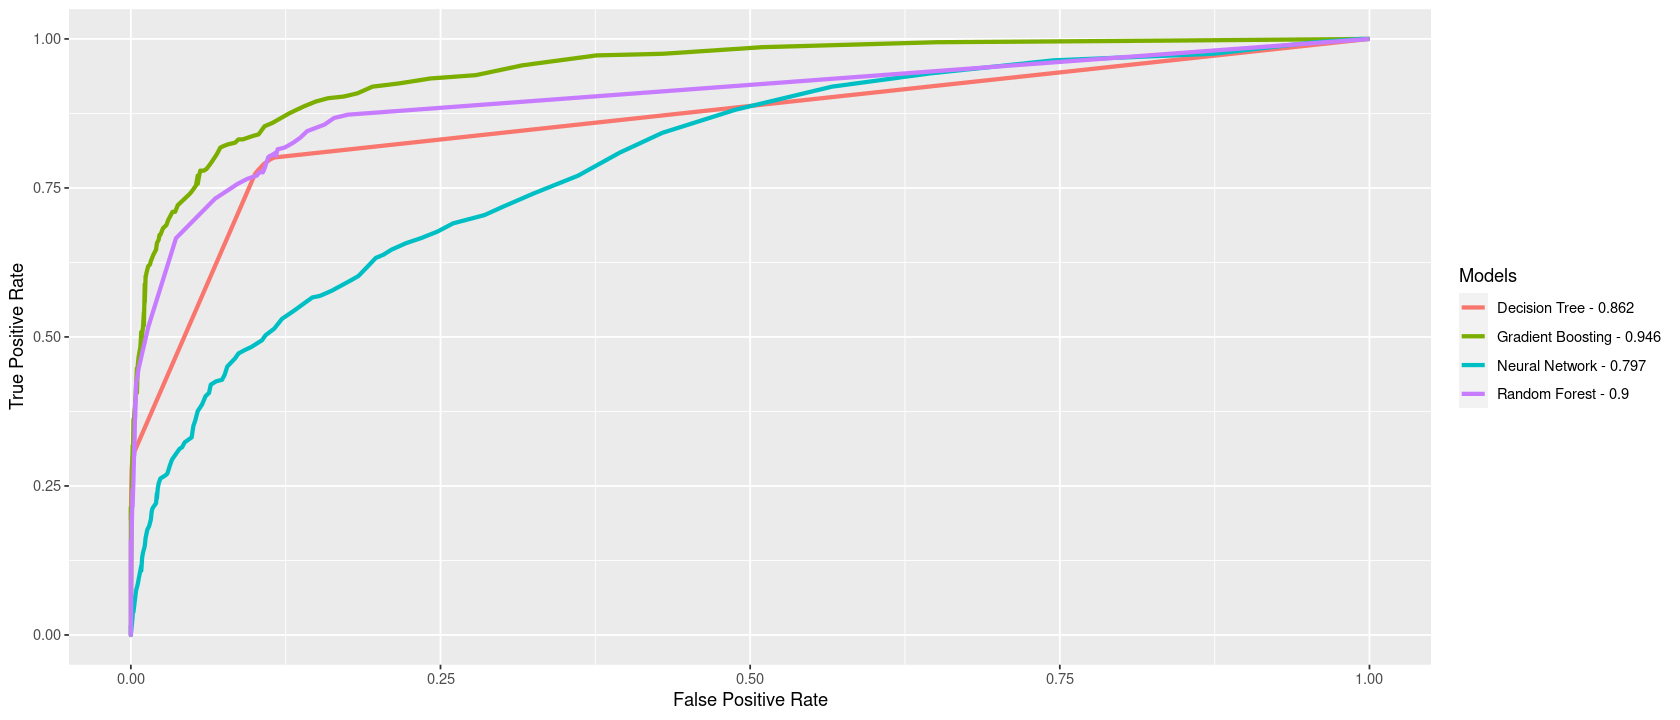

In [254]:
# Cria curva ROC
options(repr.plot.width=14, repr.plot.height=6)

plot <- ggplot(data = roc.df[c('FPR', 'Sensitivity', 'Models')],
    aes(x = FPR, y = Sensitivity, colour = Models)) +
    geom_line(size =1.2) +
    labs(x = 'False Positive Rate', y = 'True Positive Rate')
plot

In [261]:
p <- plotly::ggplotly(plot) %>% plotly::layout(plot, hovermode = "x")

plotly::embed_notebook(p)

<iframe src="data:text/html;charset=utf-8;base64,PCFET0NUWVBFIGh0bWw+CjxodG1sPgo8aGVhZD4KPG1ldGEgY2hhcnNldD0idXRmLTgiIC8+Cjx0aXRsZT5wbG90bHk8L3RpdGxlPgo8c2NyaXB0PihmdW5jdGlvbigpIHsKICAvLyBJZiB3aW5kb3cuSFRNTFdpZGdldHMgaXMgYWxyZWFkeSBkZWZpbmVkLCB0aGVuIHVzZSBpdDsgb3RoZXJ3aXNlIGNyZWF0ZSBhCiAgLy8gbmV3IG9iamVjdC4gVGhpcyBhbGxvd3MgcHJlY2VkaW5nIGNvZGUgdG8gc2V0IG9wdGlvbnMgdGhhdCBhZmZlY3QgdGhlCiAgLy8gaW5pdGlhbGl6YXRpb24gcHJvY2VzcyAodGhvdWdoIG5vbmUgY3VycmVudGx5IGV4aXN0KS4KICB3aW5kb3cuSFRNTFdpZGdldHMgPSB3aW5kb3cuSFRNTFdpZGdldHMgfHwge307CgogIC8vIFNlZSBpZiB3ZSdyZSBydW5uaW5nIGluIGEgdmlld2VyIHBhbmUuIElmIG5vdCwgd2UncmUgaW4gYSB3ZWIgYnJvd3Nlci4KICB2YXIgdmlld2VyTW9kZSA9IHdpbmRvdy5IVE1MV2lkZ2V0cy52aWV3ZXJNb2RlID0KICAgICAgL1xidmlld2VyX3BhbmU9MVxiLy50ZXN0KHdpbmRvdy5sb2NhdGlvbik7CgogIC8vIFNlZSBpZiB3ZSdyZSBydW5uaW5nIGluIFNoaW55IG1vZGUuIElmIG5vdCwgaXQncyBhIHN0YXRpYyBkb2N1bWVudC4KICAvLyBOb3RlIHRoYXQgc3RhdGljIHdpZGdldHMgY2FuIGFwcGVhciBpbiBib3RoIFNoaW55IGFuZCBzdGF0aWMgbW9kZXMsIGJ1dAogIC8vIG9idmlvdXNseSwgU2hpbnkgd2lkZ2V0cyBjYW4gb25seSBhcHBlYXIgaW4gU2hpbnkgYXBwcy9kb2N1bWVudHMuCiAgdmFyIHNoaW55TW9kZSA9IHdpbmRvdy5IVE1MV2lkZ2V0cy5zaGlueU1vZGUgPQogICAgICB0eXBlb2Yod2luZG93LlNoaW55KSAhPT0gInVuZGVmaW5lZCIgJiYgISF3aW5kb3cuU2hpbnkub3V0cHV0QmluZGluZ3M7CgogIC8vIFdlIGNhbid0IGNvdW50IG9uIGpRdWVyeSBiZWluZyBhdmFpbGFibGUsIHNvIHdlIGltcGxlbWVudCBvdXIgb3duCiAgLy8gdmVyc2lvbiBpZiBuZWNlc3NhcnkuCiAgZnVuY3Rpb24gcXVlcnlTZWxlY3RvckFsbChzY29wZSwgc2VsZWN0b3IpIHsKICAgIGlmICh0eXBlb2YoalF1ZXJ5KSAhPT0gInVuZGVmaW5lZCIgJiYgc2NvcGUgaW5zdGFuY2VvZiBqUXVlcnkpIHsKICAgICAgcmV0dXJuIHNjb3BlLmZpbmQoc2VsZWN0b3IpOwogICAgfQogICAgaWYgKHNjb3BlLnF1ZXJ5U2VsZWN0b3JBbGwpIHsKICAgICAgcmV0dXJuIHNjb3BlLnF1ZXJ5U2VsZWN0b3JBbGwoc2VsZWN0b3IpOwogICAgfQogIH0KCiAgZnVuY3Rpb24gYXNBcnJheSh2YWx1ZSkgewogICAgaWYgKHZhbHVlID09PSBudWxsKQogICAgICByZXR1cm4gW107CiAgICBpZiAoJC5pc0FycmF5KHZhbHVlKSkKICAgICAgcmV0dXJuIHZhbHVlOwogICAgcmV0dXJuIFt2YWx1ZV07CiAgfQoKICAvLyBJbXBsZW1lbnQgalF1ZXJ5J3MgZXh0ZW5kCiAgZnVuY3Rpb24gZXh0ZW5kKHRhcmdldCAvKiwgLi4uICovKSB7CiAgICBpZiAoYXJndW1lbnRzLmxlbmd0aCA9PSAxKSB7CiAgICAgIHJldHVybiB0YXJnZXQ7CiAgICB9CiAgICBmb3IgKHZhciBpID0gMTsgaSA8IGFyZ3VtZW50cy5sZW5ndGg7IGkrKykgewogICAgICB2YXIgc291cmNlID0gYXJndW1lbnRzW2ldOwogICAgICBmb3IgKHZhciBwcm9wIGluIHNvdXJjZSkgewogICAgICAgIGlmIChzb3VyY2UuaGFzT3duUHJvcGVydHkocHJvcCkpIHsKICAgICAgICAgIHRhcmdldFtwcm9wXSA9IHNvdXJjZVtwcm9wXTsKICAgICAgICB9CiAgICAgIH0KICAgIH0KICAgIHJldHVybiB0YXJnZXQ7CiAgfQoKICAvLyBJRTggZG9lc24ndCBzdXBwb3J0IEFycmF5LmZvckVhY2guCiAgZnVuY3Rpb24gZm9yRWFjaCh2YWx1ZXMsIGNhbGxiYWNrLCB0aGlzQXJnKSB7CiAgICBpZiAodmFsdWVzLmZvckVhY2gpIHsKICAgICAgdmFsdWVzLmZvckVhY2goY2FsbGJhY2ssIHRoaXNBcmcpOwogICAgfSBlbHNlIHsKICAgICAgZm9yICh2YXIgaSA9IDA7IGkgPCB2YWx1ZXMubGVuZ3RoOyBpKyspIHsKICAgICAgICBjYWxsYmFjay5jYWxsKHRoaXNBcmcsIHZhbHVlc1tpXSwgaSwgdmFsdWVzKTsKICAgICAgfQogICAgfQogIH0KCiAgLy8gUmVwbGFjZXMgdGhlIHNwZWNpZmllZCBtZXRob2Qgd2l0aCB0aGUgcmV0dXJuIHZhbHVlIG9mIGZ1bmNTb3VyY2UuCiAgLy8KICAvLyBOb3RlIHRoYXQgZnVuY1NvdXJjZSBzaG91bGQgbm90IEJFIHRoZSBuZXcgbWV0aG9kLCBpdCBzaG91bGQgYmUgYSBmdW5jdGlvbgogIC8vIHRoYXQgUkVUVVJOUyB0aGUgbmV3IG1ldGhvZC4gZnVuY1NvdXJjZSByZWNlaXZlcyBhIHNpbmdsZSBhcmd1bWVudCB0aGF0IGlzCiAgLy8gdGhlIG92ZXJyaWRkZW4gbWV0aG9kLCBpdCBjYW4gYmUgY2FsbGVkIGZyb20gdGhlIG5ldyBtZXRob2QuIFRoZSBvdmVycmlkZGVuCiAgLy8gbWV0aG9kIGNhbiBiZSBjYWxsZWQgbGlrZSBhIHJlZ3VsYXIgZnVuY3Rpb24sIGl0IGhhcyB0aGUgdGFyZ2V0IHBlcm1hbmVudGx5CiAgLy8gYm91bmQgdG8gaXQgc28gInRoaXMiIHdpbGwgd29yayBjb3JyZWN0bHkuCiAgZnVuY3Rpb24gb3ZlcnJpZGVNZXRob2QodGFyZ2V0LCBtZXRob2ROYW1lLCBmdW5jU291cmNlKSB7CiAgICB2YXIgc3VwZXJGdW5jID0gdGFyZ2V0W21ldGhvZE5hbWVdIHx8IGZ1bmN0aW9uKCkge307CiAgICB2YXIgc3VwZXJGdW5jQm91bmQgPSBmdW5jdGlvbigpIHsKICAgICAgcmV0dXJuIHN1cGVyRnVuYy5hcHBseSh0YXJnZXQsIGFyZ3VtZW50cyk7CiAgICB9OwogICAgdGFyZ2V0W21ldGhvZE5hbWVdID0gZnVuY1NvdXJjZShzdXBlckZ1bmNCb3VuZCk7CiAgfQoKICAvLyBBZGQgYSBtZXRob2QgdG8gZGVsZWdhdG9yIHRoYXQsIHdoZW4gaW52b2tlZCwgY2FsbHMKICAvLyBkZWxlZ2F0ZWUubWV0aG9kTmFtZS4gSWYgdGhlcmUgaXMgbm8gc3VjaCBtZXRob2Qgb24KICAvLyB0aGUgZGVsZWdhdGVlLCBidXQgdGhlcmUgd2FzIG9uZSBvbiBkZWxlZ2F0b3IgYmVmb3JlCiAgLy8gZGVsZWdhdGVNZXRob2Qgd2FzIGNhbGxlZCwgdGhlbiB

In [ ]:
# Fim sessao
cas.session.endSession(conn)